In [1]:
!nvidia-smi

Tue Nov 26 14:03:19 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             12W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 15.6 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.38 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)

OS                  Linux-6.6.56+-x86_64-with-glibc2.35
Environment         Kaggle
Python              3.10.14
Install             pip
RAM                 31.35 GB
Disk                5933.9/8062.4 GB
CPU                 Intel Xeon 2.00GHz
CPU count           4
GPU                 Tesla T4, 15095MiB
GPU count           2
CUDA                12.3

numpy               ✅ 1.26.4>=1.23.0
numpy               ✅ 1.26.4<2.0.0; sys_platform == "darwin"
matplotlib          ✅ 3.7.5>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 10.4.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.14.1>=1.4.1
torch               ✅ 2.4.0>=1.8.0
torch               ✅ 2.4.0!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.19.0>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Jpbah5sa91Yf8A3r6pSq")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(4)
dataset = version.download("yolov8")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-4 in yolov8:: 100%|██████████| 48488/48488 [00:05<00:00, 8993.23it/s] 


In [5]:
%cat /kaggle/working/License-Plate-Recognition-4/data.yaml

names:
- License_Plate
nc: 1
roboflow:
  license: CC BY 4.0
  project: license-plate-recognition-rxg4e
  url: https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/4
  version: 4
  workspace: roboflow-universe-projects
test: ../test/images
train: ../train/images
val: ../valid/images


In [6]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [7]:
%%writetemplate /kaggle/working/License-Plate-Recognition-4/data.yaml
names:
- License_Plate
nc: 1
roboflow:
  license: CC BY 4.0
  project: license-plate-recognition-rxg4e
  url: https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/4
  version: 4
  workspace: roboflow-universe-projects
test: /kaggle/working/License-Plate-Recognition-4/test/images
train: /kaggle/working/License-Plate-Recognition-4/train/images
val: /kaggle/working/License-Plate-Recognition-4/valid/images


In [8]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

100%|██████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 80.6MB/s]
Ultralytics 8.3.38 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/License-Plate-Recognition-4/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

In [9]:
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.38 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/License-Plate-Recognition-4/valid/labels.cache... 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       2046       2132      0.985      0.961      0.985      0.711
Speed: 0.4ms preprocess, 3.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [10]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics 8.3.38 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1019 /kaggle/working/License-Plate-Recognition-4/test/images/0002a5b67e5f0909_jpg.rf.07ca41e79eb878b14032f650f34d0967.jpg: 640x640 2 License_Plates, 9.0ms
image 2/1019 /kaggle/working/License-Plate-Recognition-4/test/images/000812dcf304a8e7_jpg.rf.559f904bc045f68ee947796a1b561d8f.jpg: 640x640 1 License_Plate, 7.4ms
image 3/1019 /kaggle/working/License-Plate-Recognition-4/test/images/0010f4c10f7ab07e_jpg.rf.92344aa620e23aacc490273e32343595.jpg: 640x640 1 License_Plate, 7.4ms
image 4/1019 /kaggle/working/License-Plate-Recognition-4/test/images/001cdd25e148cd36_jpg.rf.eca53e55e3cf5986bcfd95bc277b6438.jpg: 640x640 1 License_Plate, 7.3ms
image 5/1019 /kaggle/working/License-Plate-Recognition-4/test/images/002519f868563098_jpg.rf.b9450b9265c92d8d3bd96bdfeff635e5.jpg: 640x640 1 License_Plate, 7.4ms
image 6/1019 /kaggle/working/Li

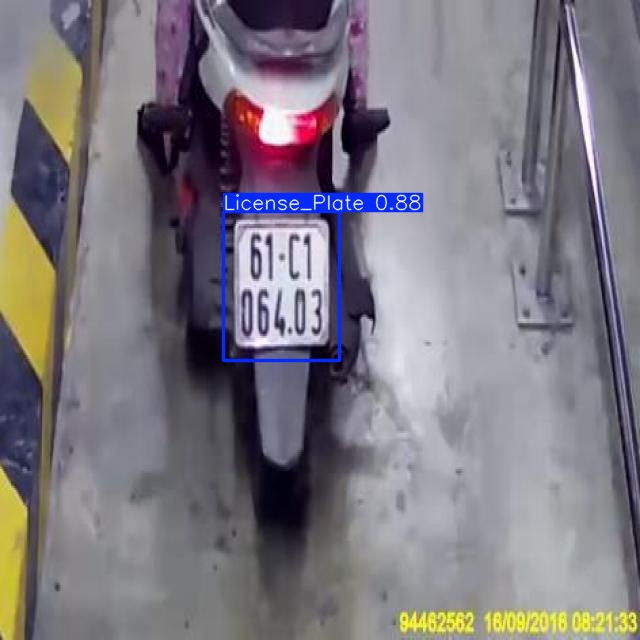

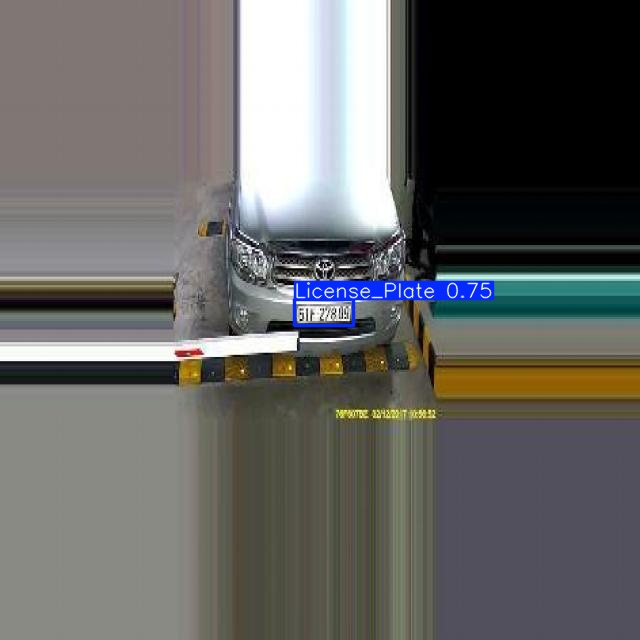

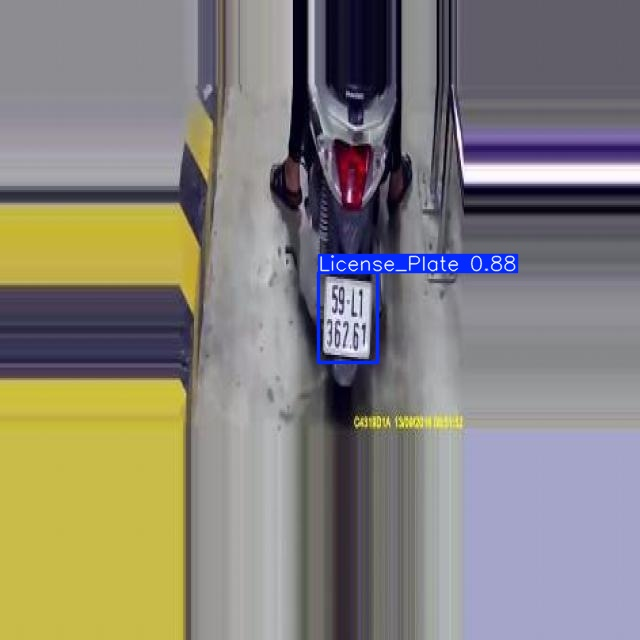

In [11]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/kaggle/working/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")